Import the necessary libraries, load the dataset, and explore the dataset.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

movies = pd.read_csv('https://raw.githubusercontent.com/JuanAraque11/Analisis_Movies/main/imdb_top_1000.csv')

# Show the first two records
movies.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


View information about the dataset.

In [20]:
print("Dataset Information:")
print(movies.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


View the shape of the dataset.

In [21]:
print("Dataset Shape:")
print(movies.shape)

Dataset Shape:
(1000, 16)


Show the first 5 records of the dataset.

In [22]:
print("First 5 records:")
print(movies.head())

First 5 records:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

        

Show the last 5 records of the dataset.

In [23]:
print("Last 5 records:")
print(movies.tail())

Last 5 records:
                                           Poster_Link  \
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

               Series_Title Released_Year Certificate  Runtime  \
995  Breakfast at Tiffany's          1961           A  115 min   
996                   Giant          1956           G  201 min   
997   From Here to Eternity          1953      Passed  118 min   
998                Lifeboat          1944         NaN   97 min   
999            The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
995    Comedy, Drama, Romance          7.6   
996            Drama, Western          7.6   
997       Drama, Romance, War          7.6   
998                Drama, War          7.6   
999  Cri

Missing data in the dataset.

In [24]:
movies.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Replace the null values in the dataset with missing data.

In [25]:
# Replace missing values in the 'Certificate' column with mode
movies['Certificate'] = movies['Certificate'].fillna(movies['Certificate'].
                                                     mode()[0])

# Replace missing values in the 'Meta_score' column with median
movies['Meta_score'] = movies['Meta_score'].fillna(movies['Meta_score'].
                                                   median())

# Replace missing values in the 'Gross' column with mode
movies['Gross'] = movies['Gross'].fillna(movies['Gross'].mode()[0])

# Show the updated dataset
movies.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Separate the genres of each record to create bar charts and see their distribution.

In [26]:
# Split the genres of each record
movies['Genre'] = movies['Genre'].str.split(', ')

# Create a list of all genres
all_genres = [genre for sublist in movies['Genre'] for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(all_genres).value_counts()

print(genre_counts)

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64


Create bar chart.

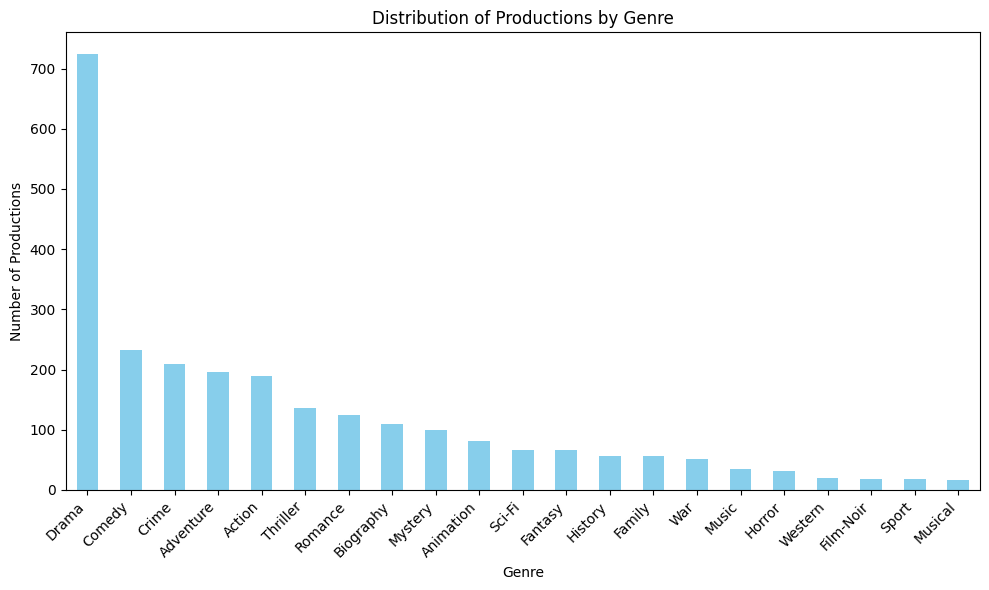

In [27]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Productions by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

View the top 10 most voted movies.

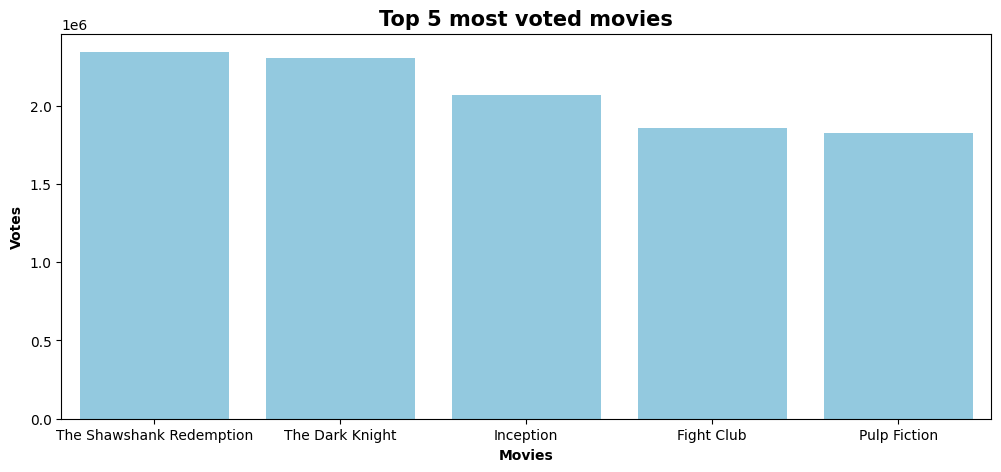

In [28]:
# Create a new df sorted by the 'No_of_Votes' column in descending order
top_5_movies = movies.sort_values(by='No_of_Votes', ascending=False).head(5)

# Plot the first 10 records
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=top_5_movies['Series_Title'], y=top_5_movies['No_of_Votes'],
            color='skyblue')
plt.title('Top 5 most voted movies', fontweight='bold', fontsize=15)
plt.xlabel('Movies', fontsize=10, fontweight='bold')
plt.ylabel('Votes', fontsize=10, fontweight='bold')
plt.show()

View the directors with the most movies in the top.

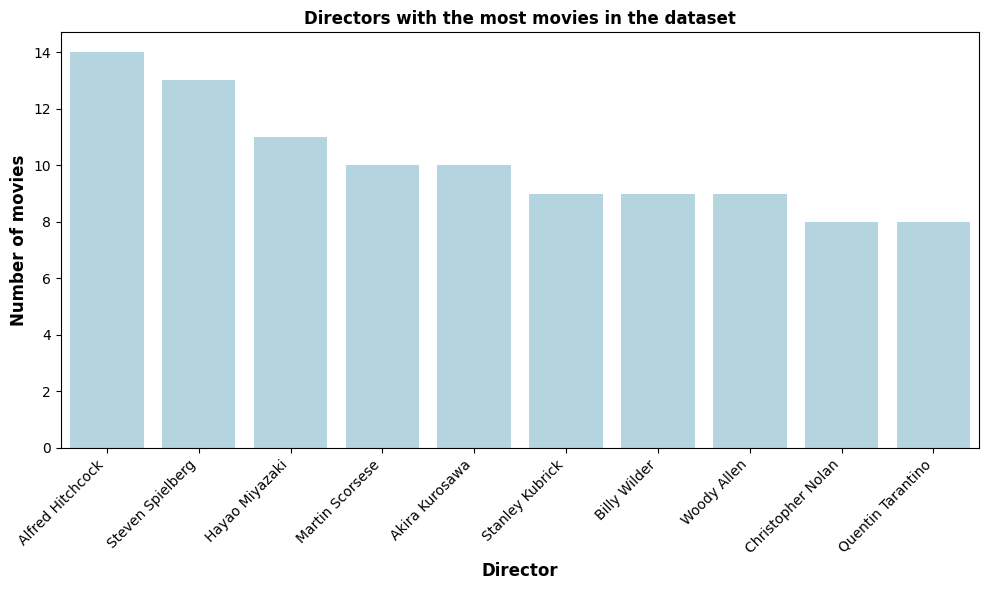

In [29]:
# Count the number of movies per director
director_counts = movies['Director'].value_counts()

# Select the directors with the most movies (for example, the top 10)
top_directors = director_counts.head(10)

# Plot the directors with the most movies
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, color='lightblue')
plt.title('Directors with the most movies in the dataset', fontweight='bold')
plt.xlabel('Director', fontsize=12, fontweight='bold')
plt.ylabel('Number of movies', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualize the proportion of productions according to their certification.

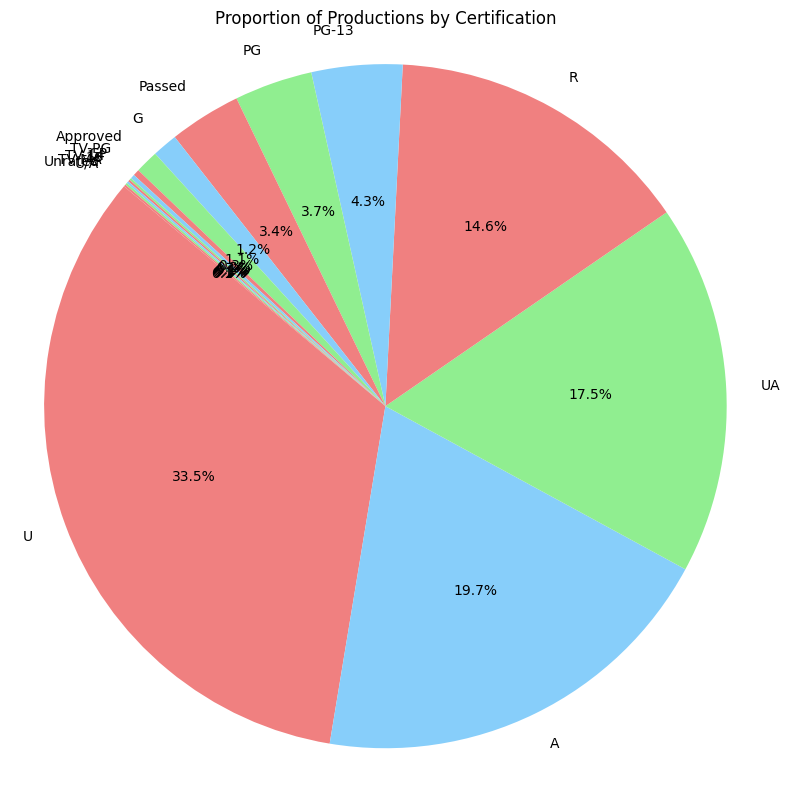

In [30]:
# Count the frequency of each certification
certificate_counts = movies['Certificate'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(certificate_counts, labels=certificate_counts.index, autopct='%1.1f%%',
        startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Proportion of Productions by Certification')
plt.axis('equal')
plt.tight_layout()
plt.show()

Scatter plot for IMDb Rating vs. Meta Score.

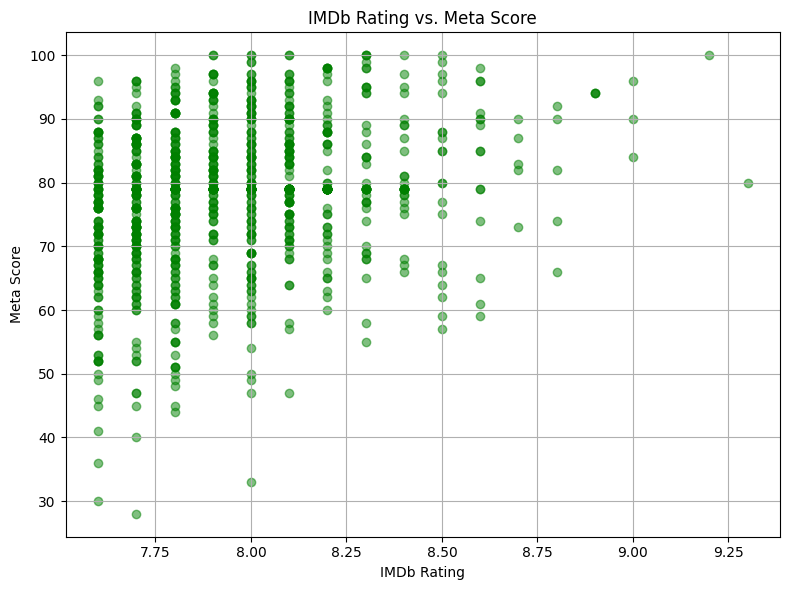

In [31]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(movies['IMDB_Rating'], movies['Meta_score'], color='green',
            alpha=0.5)
plt.title('IMDb Rating vs. Meta Score')
plt.xlabel('IMDb Rating')
plt.ylabel('Meta Score')
plt.grid(True)
plt.tight_layout()
plt.show()


Visualize the number of movies per year.

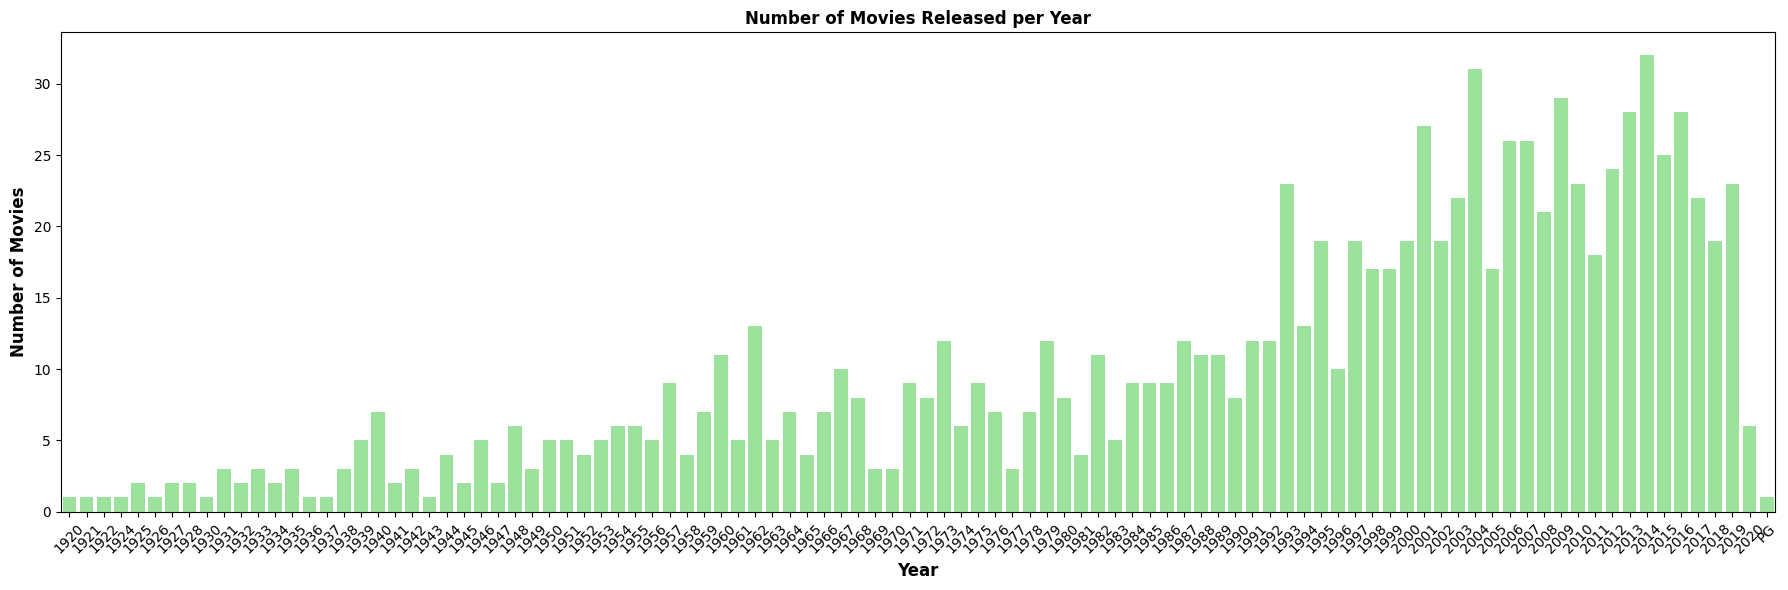

In [32]:
# Count the number of movies per year
movies_per_year = movies['Released_Year'].value_counts().sort_index()

# Plot the number of movies per year
plt.figure(figsize=(18, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values,
            color='lightgreen')
plt.title('Number of Movies Released per Year', fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identify the 7 stars that appear most frequently in the top.

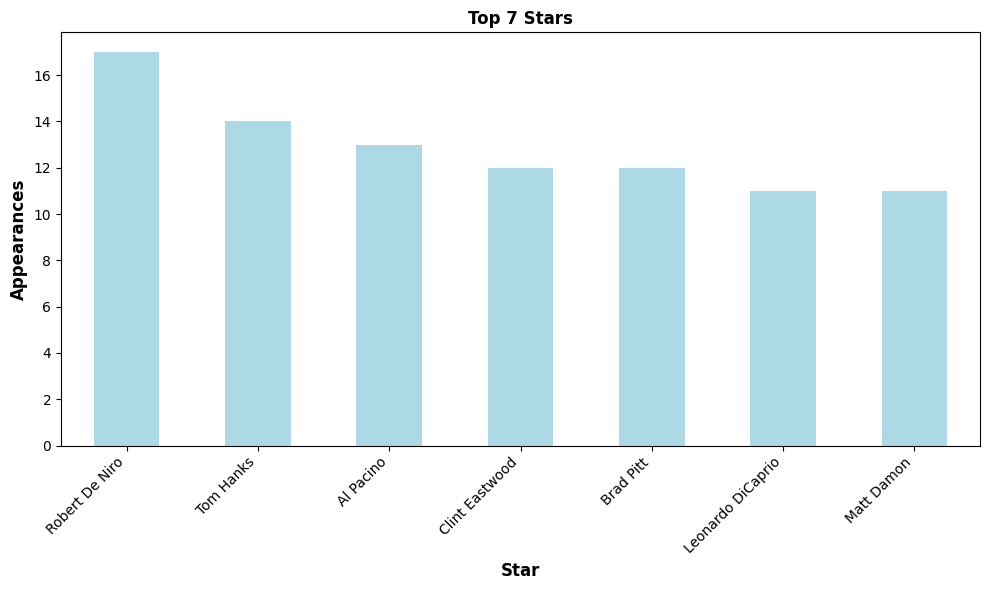

In [33]:
# Create a series with all the stars from the 'Star1, 2, 3, 4' columns
all_stars = pd.concat([movies['Star1'], movies['Star2'],
                       movies['Star3'], movies['Star4']])

# Count the number of times each star appears
star_counts = all_stars.value_counts()

# Create a bar chart of the top 7 stars
plt.figure(figsize=(10, 6))
star_counts.head(7).plot(kind='bar', color='lightblue')
plt.title('Top 7 Stars', fontweight='bold')
plt.xlabel('Star', fontsize=12, fontweight='bold')
plt.ylabel('Appearances', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

View the top 5 highest-rated animated movies.

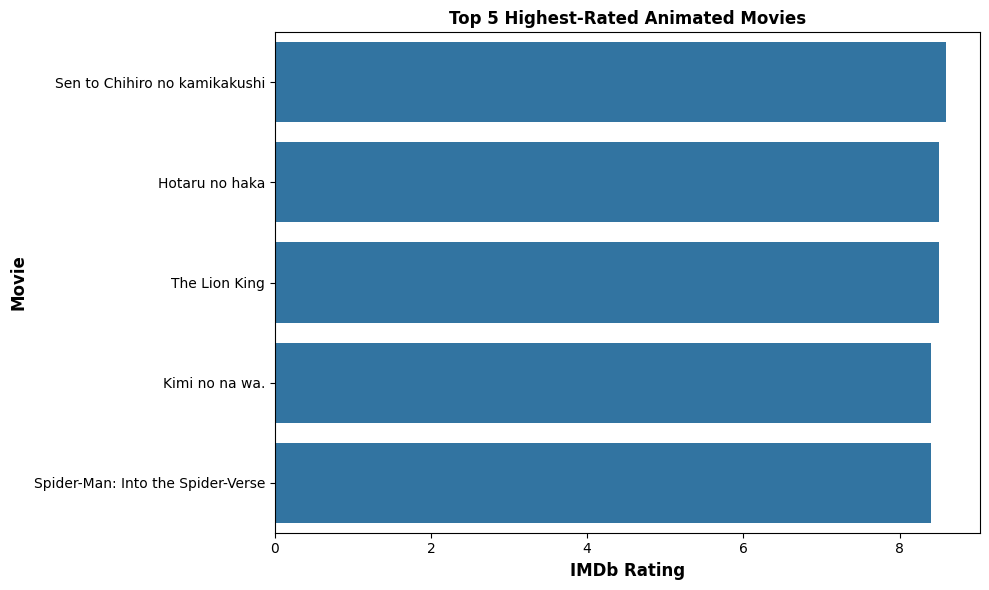

In [34]:
# Filter the movies with the genre 'animation'
animation_movies = movies[movies['Genre'].apply(lambda x: 'Animation' in x)]

# Sort the movies by their IMDb rating in descending order
top_5_animation_movies = animation_movies.sort_values(by='IMDB_Rating', ascending=False).head(5)

# Plot the top 5 highest-rated animated movies
plt.figure(figsize=(10, 6))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_5_animation_movies)
plt.title('Top 5 Highest-Rated Animated Movies', fontweight='bold')
plt.xlabel('IMDb Rating', fontsize=12, fontweight='bold')
plt.ylabel('Movie', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()